# Insurance Charges Prediction using Regression Models

### Project Overview

This project aims to predict medical insurance charges based on personal and lifestyle attributes such as age, BMI, smoking status, and region. The dataset used is the popular `insurance.csv`, which is commonly used for regression-based Statistical learning tasks.

### Objective

The primary goal is to build and compare multiple regression models to determine which one performs best in predicting charges.
We aim to:

* Understand the structure and distribution of the dataset
* Analyze relationships between features and the target (`charges`)
* Apply and compare a variety of regression models
* Evaluate model performance using metrics such as MSE, R², and Adjusted R²

### What We Are Doing in This Week

#### 1. Study of Dataset (Exploratory Data Analysis)

* Checking distribution, skewness, and kurtosis
* Scatterplots between features and `charges`
* Correlation heatmap
* PCA projection to understand spread in high-dimensional space

#### 2. Regression Model Implementation

We implemented the following models from scratch or using Scikit-learn:

* **Ordinary Least Squares (OLS)**
* **Ridge Regression (L2 Regularization)**
* **Lasso Regression (L1 Regularization)**
* **Decision Tree Regressor (with cost-complexity pruning)**
* **Random Forest Regressor (ensemble of trees)**
* **Gradient Boosting Regressor (sequential ensemble)**

Each model is trained on the same dataset split and evaluated using:

* Mean Squared Error (MSE)
* R² Score
* Adjusted R² Score

#### 3. Model Comparison Table

At the end, we present a comparison table to identify the best-performing model.

### Why This Is Useful

This project is a complete walkthrough of practical statistical learning using regression models. It involves both coding and evaluation, while also emphasizing an understanding of the data distribution, model intuition, and the reasoning behind model performance.



# **Study of Dataset**

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')
(1338, 7)


   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
 Skewness & Kurtosis of features:
age                  | Skew: 0.06 | Kurtosis: -1.24


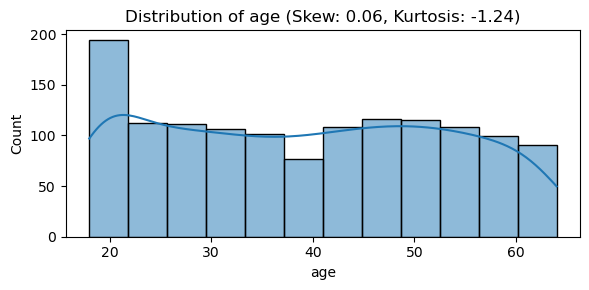

bmi                  | Skew: 0.28 | Kurtosis: -0.06


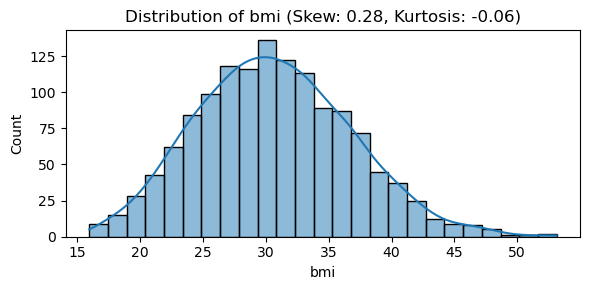

children             | Skew: 0.94 | Kurtosis: 0.20


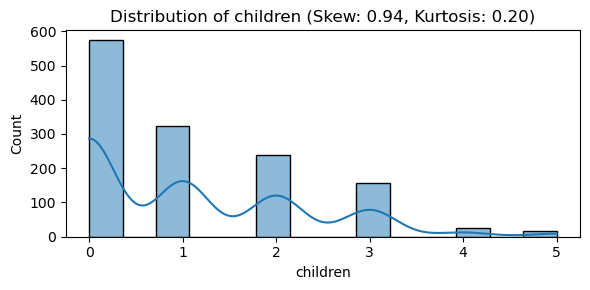

sex_male             | Skew: -0.02 | Kurtosis: -2.00


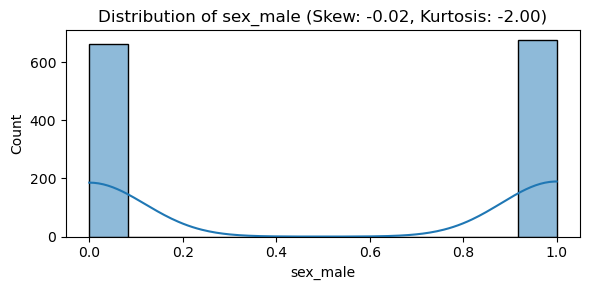

smoker_yes           | Skew: 1.46 | Kurtosis: 0.14


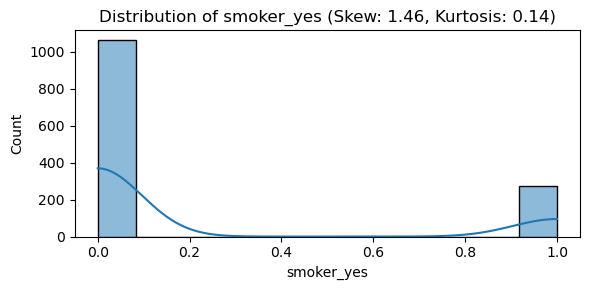

region_northwest     | Skew: 1.20 | Kurtosis: -0.56


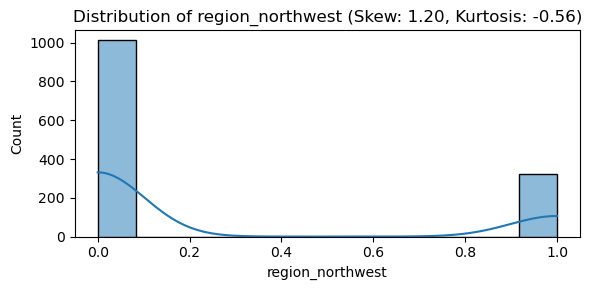

region_southeast     | Skew: 1.02 | Kurtosis: -0.95


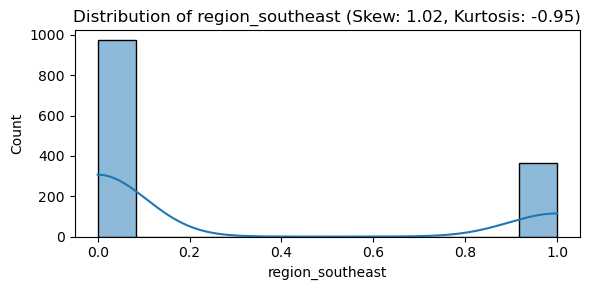

region_southwest     | Skew: 1.20 | Kurtosis: -0.56


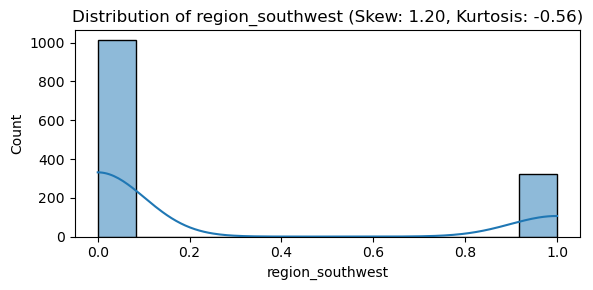


 Relationship with Target (charges):


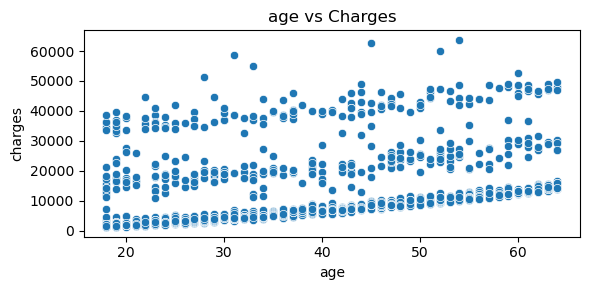

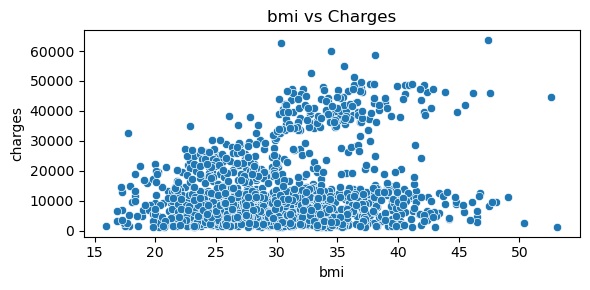

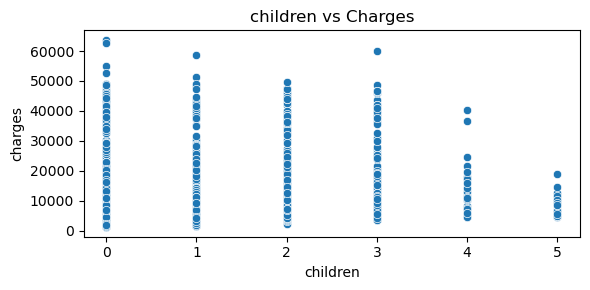

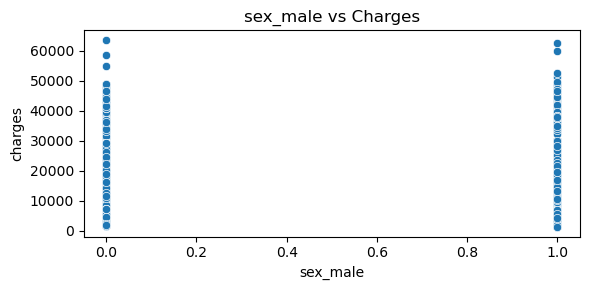

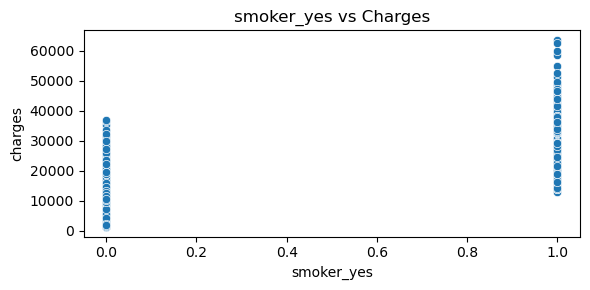

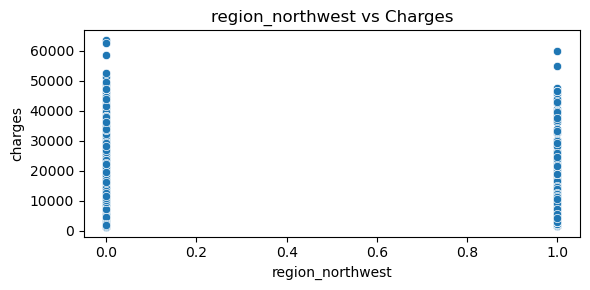

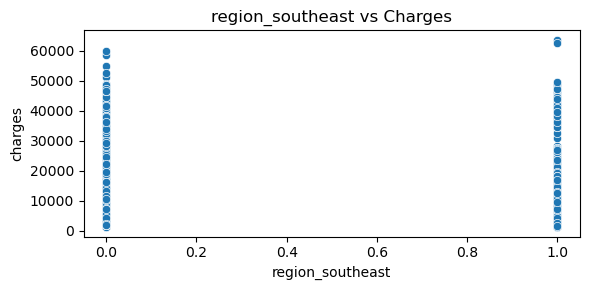

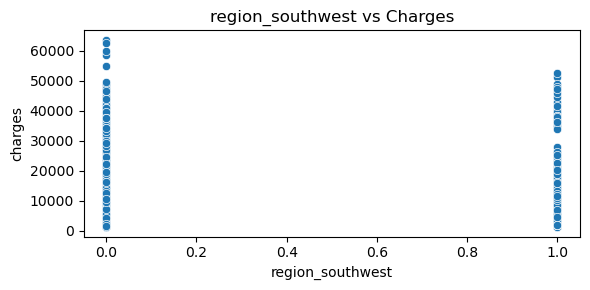

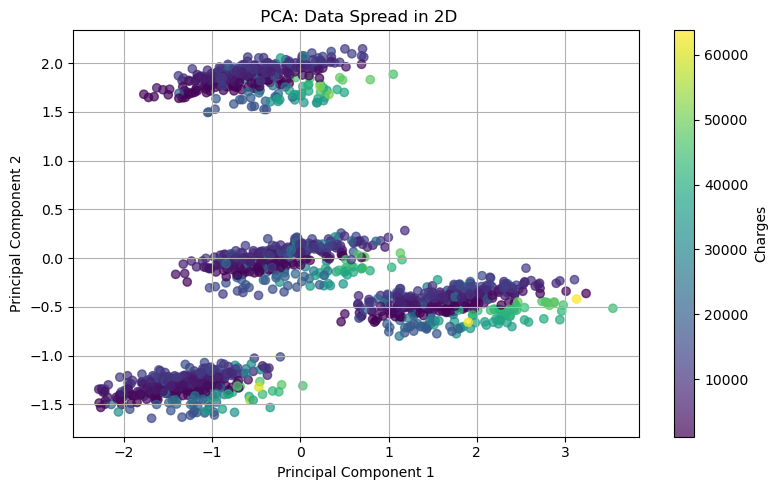


The correlation of charges with other predictor : 

charges             1.000000
smoker_yes          0.787251
age                 0.299008
bmi                 0.198341
region_southeast    0.073982
children            0.067998
sex_male            0.057292
region_northwest   -0.039905
region_southwest   -0.043210
Name: charges, dtype: float64


,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


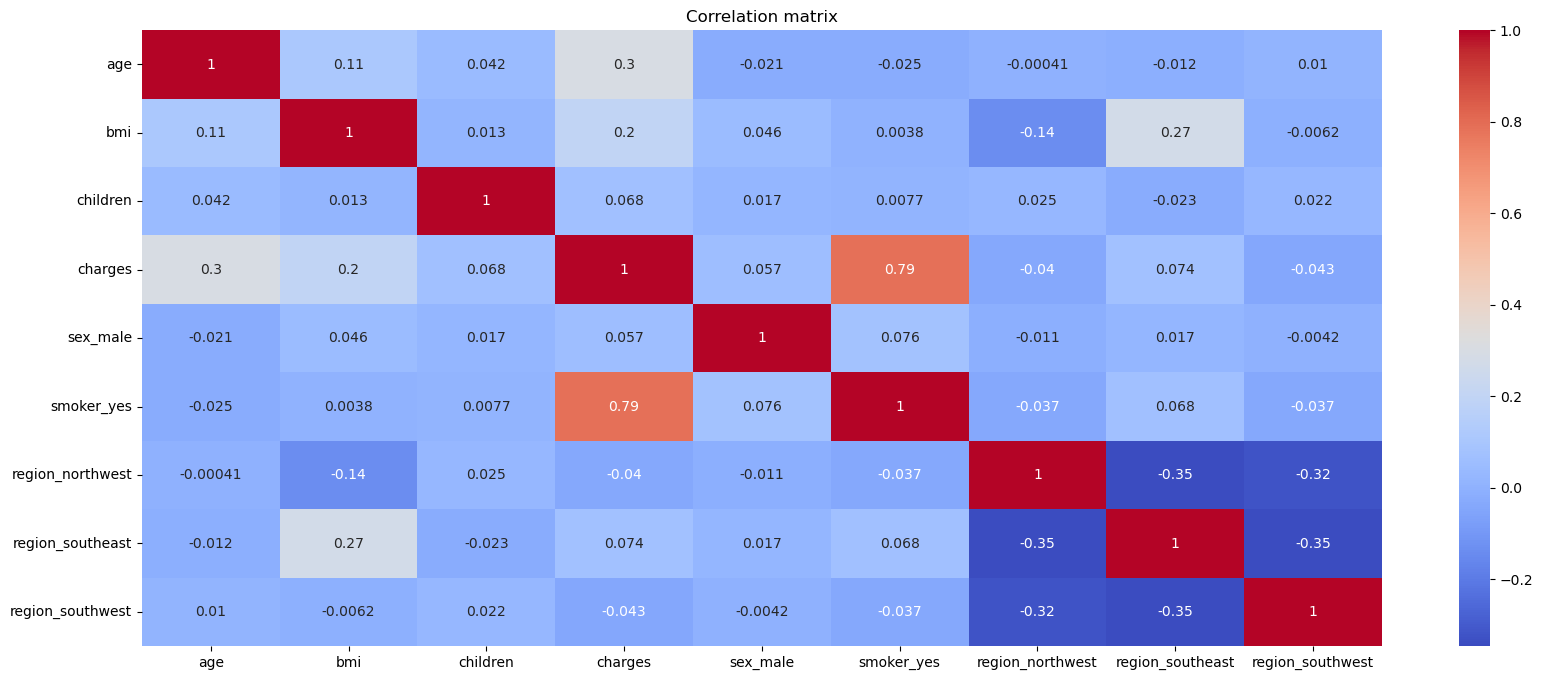

In [5]:


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from matplotlib.pyplot import subplots
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
import random
from sklearn.utils import resample
import warnings
warnings.filterwarnings('ignore', category=RuntimeWarning)
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.stats import skew, kurtosis


insurance = pd.read_csv('insurance.csv')
print(insurance.columns)


print(insurance.shape)
print("\n")
#Looking for description of dataset
print(insurance.head(5))


#changing qualitative predictor to quantitative predictor
insurance = pd.get_dummies(insurance, columns= ['sex' , 'smoker', 'region' ], drop_first=True) 
bool_col = insurance.select_dtypes(include = 'bool').columns
insurance[bool_col] = insurance[bool_col].astype(int)


# Features & Target
X = insurance.drop('charges', axis=1)
y = insurance['charges']

data_plot(insurance, X, y)

selected_features = ['age', 'smoker_yes', 'bmi', 'region_southeast' , 'children' , 'sex_male' , 'region_northwest' , 'region_southwest' ]
X = insurance[selected_features].values
y = insurance['charges'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


cor_rel = insurance.corr()
cor = cor_rel['charges'].sort_values(ascending= False)
print('\nThe correlation of charges with other predictor : \n')
print(cor)
insurance.head()



In [6]:


def data_plot(data , X, y):

    # 2.  Univariate Distribution + Skewness & Kurtosis
    print(" Skewness & Kurtosis of features:")
    for col in X.columns:
        s = skew(X[col])
        k = kurtosis(X[col])
        print(f"{col:<20} | Skew: {s:.2f} | Kurtosis: {k:.2f}")
        plt.figure(figsize=(6, 3))
        sns.histplot(X[col], kde=True)
        plt.title(f'Distribution of {col} (Skew: {s:.2f}, Kurtosis: {k:.2f})')
        plt.tight_layout()
        plt.show()

    # 3.  Feature vs Target (charges)
    print("\n Relationship with Target (charges):")
    for col in X.columns:
        plt.figure(figsize=(6, 3))
        sns.scatterplot(x=X[col], y=y)
        plt.title(f'{col} vs Charges')
        plt.tight_layout()
        plt.show()

    # 4.  PCA - High-dimensional Data Spread
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_scaled)

    plt.figure(figsize=(8, 5))
    scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.7)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title(' PCA: Data Spread in 2D')
    cbar = plt.colorbar(scatter)
    cbar.set_label('Charges')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # 5. Correlation matrix
    cor_rel = data.corr()
    k,l = subplots(figsize = (20,8))
    sns.heatmap(cor_rel, annot= True, cmap='coolwarm' )
    l.set_title('Correlation matrix')

## **Function for Plot:**


- `plot(y_true, y_pred)`: Displays side-by-side plots of actual vs predicted values and residuals vs predicted values for visual model diagnostics.


In [7]:
def plot(y, y_pred):
    residuals = y - y_pred

    plt.figure(figsize=(20,6))
    plt.scatter(y, y_pred, color='blue', edgecolor='k')
    plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.title("Predicted vs Actual")
    plt.grid(True)
    plt.show()

    # Residual plot
    plt.figure(figsize=(20,6))
    plt.scatter(y_pred, residuals, color='purple', edgecolor='k')
    plt.axhline(0, color='red', linestyle='--')
    plt.xlabel("Predicted Values")
    plt.ylabel("Residuals")
    plt.title("Residual Plot")
    plt.grid(True)
    plt.show()

# **Linear Models:**

### 1. **Ordinary Least Squares (OLS)**
- No regularization.
- Directly solves:  
  **β = (XᵀX)⁻¹ Xᵀy**
- Assumes all predictors are important.
- Sensitive to multicollinearity and overfitting.

### Function Descriptions (OLS Regression)

- `corr(x, y)`: Calculates the Pearson correlation coefficient between two vectors `x` and `y`.

- `run_multiple_linear_regression(X, y, X_test=0, y_test=0, feature_names=None)`: 
  Performs multiple linear regression using the normal equation. Returns regression coefficients, residuals, RSE, R², correlation, and F-statistic for training data. Also evaluates test performance if test data is provided.

- `test_evaluation_using_beta(beta, X_test, y_test)`: 
  Evaluates the trained OLS model on the test dataset using the learned coefficients. Computes RSE, R², and correlation metrics for the test set.


In [8]:


def corr(x, y):
    x_avg = np.mean(x)
    y_avg = np.mean(y)
    cor_num = np.sum((x - x_avg) * (y - y_avg))
    cor_den = np.sqrt(np.sum((x - x_avg)**2) * np.sum((y - y_avg)**2))
    return cor_num / cor_den

def run_multiple_linear_regression(X, y,X_test = 0, y_test = 0, feature_names=None):
    """
    Performs multiple linear regression using normal equation method and generates evaluation metrics + plots.

    Parameters:
        X (ndarray): n x p predictor matrix (without intercept)
        y (ndarray): n x 1 response vector
        feature_names (list): Optional, list of feature names for plotting
        plot (bool): If True, show plots

    Returns:
        dict: containing beta, y_pred, RSE, R², correlation, F-stat
    """
    n, p = X.shape
    X_design = np.hstack((np.ones((n, 1)), X))  # Add intercept term
    beta = np.linalg.inv(X_design.T @ X_design) @ X_design.T @ y
    y_pred = X_design @ beta

    # Compute statistics
    residuals = y - y_pred
    tss = np.sum((y - np.mean(y)) ** 2)
    rss = np.sum((y - y_pred) ** 2)
    RSE = np.sqrt(rss / (n - p - 1))
    R_squared = 1 - rss / tss
    r = corr(y, y_pred)

    # F-statistic
    F_stat = ((tss - rss) / p) / (rss / (n - p - 1))

    # # Print results
    print("\n--- Train Evaluation ---")

    #print("Regression Coefficients (Beta):", beta)
    print("\n")
    print("Residual Standard Error (RSE):", RSE)
    print("R-squared:", R_squared)
    print("Correlation between actual and predicted:", r)
    print("R-squared vs. Correlation squared:", R_squared, "vs", r ** 2)
    if round(F_stat) == 1:
        print("H0: F-statistic is ~1, model may not be significant.")
    else:
        print("H1: F-statistic =", F_stat, "→ likely significant.")
        
    if X_test is not None and y_test is not None:
        test_result = test_evaluation_using_beta(beta, X_test, y_test)

    
    plot(y, y_pred)


    return {
        "beta": beta,
        "y_pred": y_pred,
        "RSE": RSE,
        "R_squared": R_squared,
        "correlation": r,
        "F_stat": F_stat,
        "residuals": residuals
    }

def test_evaluation_using_beta(beta, X_test, y_test):
    n, p = X_test.shape
    X_test_design = np.hstack((np.ones((n, 1)), X_test))  # Add intercept
    y_pred_test = X_test_design @ beta

    tss = np.sum((y_test - np.mean(y_test)) ** 2)
    rss = np.sum((y_test - y_pred_test) ** 2)
    RSE = np.sqrt(rss / (n - p - 1))
    R_squared = 1 - rss / tss
    r = corr(y_test, y_pred_test)

    print("\n--- Test Evaluation ---")
    print("Residual Standard Error (RSE):", RSE)
    print("R-squared:", R_squared)
    print("Correlation between actual and predicted:", r)
    print("R-squared vs. Correlation squared:", R_squared, "vs", r ** 2)

    return {
        "RSE": RSE,
        "R_squared": R_squared,
        "correlation": r,
        "y_pred": y_pred_test,
        "residuals": y_test - y_pred_test
    }




### 2. **Ridge Regression (L2 Regularization)**
- Penalizes large coefficients with λ * ∑(β²)
- Solves:  
  **β = (XᵀX + λI)⁻¹ Xᵀy**
- Shrinks coefficients but doesn’t set any to zero.
- Great for multicollinearity and numerical stability.

### Function Descriptions (Ridge Regression)

- `train_f(x, y, lembda)`:
  Trains a ridge regression model using the closed-form solution by minimizing the penalized least squares cost. Returns the coefficient vector without the intercept.

- `test_f(x, y, lembda, b_train)`:
  Recieve Beta and give prediction on test data and also evaluates the mean squared error (MSE) on given data using the learned coefficients `b_train`.

- `prediction_evaluation(data, x, y, lembda=np.linspace(0, 100, 9000))`:
  Performs Ridge regression with 5-fold cross-validation over a range of lambda values. Selects the best lambda based on test error, trains the final model, unstandardizes the coefficients, computes evaluation metrics (MSE, RSS, TSS, Cp, Adjusted R², AIC, BIC), and plots actual vs predicted values.


In [ ]:


def train_f(x, y, lembda):
    r, c = x.shape
    identity = np.eye(c)
    return np.linalg.inv(x.T @ x + lembda * identity) @ x.T @ y

def test_f(x, y, lembda, b_train):
    r, c = x.shape
    preds = x @ b_train
    return (1/r) * np.sum((preds - y)**2)

def test_x_pred(x, y, lembda, b_train):
    r, c = x.shape
    preds = x @ b_train
    test_r2 = r2_score(y, preds)
    test_mse = (1/r) * np.sum((preds - y)**2)
    print(f' Test R2: {test_r2:.4f}')
    print(f' Test MSE: {test_mse:.4f}')
    return

def prediction_evaluation(data, x,y, lembda = np.linspace(0, 100, 9000)):

    col = data.columns

    n = len(x)

    # Standardizing predictors
    x_mean = np.mean(x, axis=0)
    x_stdiv = np.std(x, axis=0)
    x_std = (x - x_mean) / x_stdiv

    #finding the k-part data
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    kf.get_n_splits(x_std)
    kf.split(x_std)

    splits = []
    #x_test,x_train,y_test,y_train = 0,0,0,0
    for train_index, test_index in kf.split(x_std):
        x_train , x_test = x_std[train_index] , x_std[test_index]
        y_train , y_test = y[train_index] , y[test_index]
        splits.append((x_train, y_train, x_test, y_test))

    (x_train_fold1, y_train_fold1, x_test_fold1, y_test_fold1) = splits[0]
    (x_train_fold2, y_train_fold2, x_test_fold2, y_test_fold2) = splits[1]
    (x_train_fold3, y_train_fold3, x_test_fold3, y_test_fold3) = splits[2]
    (x_train_fold4, y_train_fold4, x_test_fold4, y_test_fold4) = splits[3]
    (x_train_fold5, y_train_fold5, x_test_fold5, y_test_fold5) = splits[4]

    train_error = []
    test_error = []

    #train test on split 5 dataset
    for i in lembda:
        train_error_fold = []
        test_error_fold = []

        b = (train_f(x_train_fold1, y_train_fold1, i))
        train_error_fold.append(test_f(x_train_fold1, y_train_fold1, i, b))
        test_error_fold.append(test_f(x_test_fold1, y_test_fold1, i, b))

        b = (train_f(x_train_fold2, y_train_fold2, i))
        train_error_fold.append(test_f(x_train_fold2, y_train_fold2, i, b))
        test_error_fold.append(test_f(x_test_fold2, y_test_fold2, i, b))


        b = (train_f(x_train_fold3, y_train_fold3, i))
        train_error_fold.append(test_f(x_train_fold3, y_train_fold3, i, b))
        test_error_fold.append(test_f(x_test_fold3, y_test_fold3,i, b))

        b = (train_f(x_train_fold4, y_train_fold4, i))
        train_error_fold.append(test_f(x_train_fold4, y_train_fold4, i, b))
        test_error_fold.append(test_f(x_test_fold4, y_test_fold4, i, b))

        b = (train_f(x_train_fold5, y_train_fold5, i))
        train_error_fold.append(test_f(x_train_fold5, y_train_fold5, i, b))
        test_error_fold.append(test_f(x_test_fold5, y_test_fold5, i, b))

        # calculating average of error for each lambda
        train_error.append(np.average(train_error_fold))
        test_error.append(np.average(test_error_fold))

    best_index = np.argmin(test_error)
    best_lambda = lembda[best_index]
    print(f"The best lambda is : {best_lambda:.4f}")

    # Train on full dataset with best lambda
    b_ridge = train_f(x_std, y, best_lambda)  # coefficients without intercept

    # Un-standardize coefficients
    b_aft_std = b_ridge / x_stdiv
    b0 = np.mean(y) - np.sum(b_aft_std * x_mean)

    # b_full includes intercept
    b_full = np.insert(b_aft_std, 0, b0)

    # Compute MSE on full dataset - must add intercept column to x_std
    x_full = np.c_[np.ones(n), x]

    y_pred_full = x_full @ b_full
    y_pred_ridge = y_pred_full

    final_mse = np.mean((y - y_pred_full)**2)
    print(f'Final training MSE is : {final_mse:.4f}\n')



    # # Print coefficients
    # print(f"Intercept (b0): {b0:.4f}")
    # for i in range(len(b_aft_std)):
    #     print(f"Coefficient of {col[i]}: {b_aft_std[i]:.4f}")

    # Calculate RSS and TSS using full standardized data with intercept
    RSS = np.sum((y - y_pred_full)**2)
    TSS = np.sum((y - np.mean(y))**2)
    print(f'Total Sum of Squares (TSS) is : {TSS:.4f}')
    print(f'Residual Sum of Squares (RSS) is : {RSS:.4f}')

    # Mallow's Cp
    d = len(b_aft_std)  # number of predictors without intercept

    # OLS fit for sigma^2 estimation
    b_ols = np.linalg.inv(x_full.T @ x_full) @ (x_full.T @ y)
    residual_ols = y - x_full @ b_ols
    rss_full = np.sum(residual_ols**2)
    sigma_sq = rss_full / (n - d - 1)
    
    
    train_r2 = r2_score(y, y_pred_ridge)
    print(f'Train R^2 : {train_r2:.4f}')

    train_mse = mean_squared_error(y, y_pred_ridge)
    print(f'Train MSE : {train_mse:.4f}')

    
    
    Cp = (1 / n) * (RSS + 2 * d * sigma_sq)
    print(f'CP is : {Cp:.4f}')

    # Adjusted R^2
    adj_R_sqr = 1 - ((RSS * (n - 1)) / (TSS * (n - d - 1)))
    print(f'Adjusted R^2 is : {adj_R_sqr:.4f}')

    # AIC and BIC
    aic = n * np.log(RSS / n) + 2 * d
    bic = n * np.log(RSS / n) + d * np.log(n)
    print(f'AIC is : {aic:.4f}')
    print(f'BIC is : {bic:.4f}')

    return b_full , y_pred_full , best_lambda

def ridge_model(data ,X_train , y_train , X_test, y_test, lembda):
    
    b_full , y_train_pre , lembda = prediction_evaluation(data, X_train, y_train,lembda)
    x_test = np.column_stack((np.ones(X_test.shape[0]), X_test))
    
    test_x_pred(x_test, y_test, lembda, b_full)
    plot(y_train, y_train_pre)



### 3. **Lasso Regression (L1 Regularization)**
- Penalizes absolute values: λ * ∑|β|
- Performs **feature selection**: some coefficients become zero.
- Works well when few predictors are actually useful.
- Needs iterative solvers like coordinate descent.

### Function Descriptions (Lasso Regression)

- `soft_threshold(rho, lam)`:
  Implements the soft-thresholding operator used in Lasso to shrink coefficients toward zero based on the lambda value.

- `lasso_coordinate_descent(X, y, lam, tol=1e-4, max_iter=1000)`:
  Solves the Lasso regression using coordinate descent algorithm. Iteratively updates each coefficient using soft-thresholding until convergence.

- `adjusted_r2_score(y_true, y_pred, p)`:
  Computes the adjusted R-squared based on predicted and actual values, accounting for the number of predictors.

- `lasso(x, y, lambda_values=np.logspace(-2, 3, 200))`:
  Applies 10-fold cross-validation over a range of lambda values to find the optimal one for Lasso regression. Standardizes data, trains final model, evaluates it using multiple metrics (Cp, AIC, BIC, RMSE, R², adjusted R²), and visualizes predictions vs actuals.


In [10]:


# Soft Thresholding Function
def soft_threshold(rho, lam):
    if rho < -lam:
        return rho + lam
    elif rho > lam:
        return rho - lam
    else:
        return 0.0

# Lasso via Coordinate Descent
def lasso_coordinate_descent(X, y, lam, tol=1e-4, max_iter=1000):
    n, p = X.shape
    beta = np.zeros(p)

    for _ in range(max_iter):
        beta_old = beta.copy()
        for j in range(p):
            X_j = X[:, j]
            y_pred = X @ beta
            residual = y - y_pred + beta[j] * X_j
            rho_j = np.dot(X_j, residual)
            beta[j] = soft_threshold(rho_j / n, lam) / (np.dot(X_j, X_j) / n)
        if np.sum(np.abs(beta - beta_old)) < tol:
            break
    return beta

# Adjusted R² Function
def adjusted_r2_score(y_true, y_pred, p):
    n = len(y_true)
    r2 = r2_score(y_true, y_pred)
    return 1 - (1 - r2) * (n - 1) / (n - p - 1)


def lasso(x_full,y_full, lambda_values = np.logspace(-2, 3, 200)):
    


    x,x_test , y, y_test = train_test_split(x_full,y_full, test_size=0.2, random_state=42 )
    x_mean = np.mean(x, axis=0)
    x_std = np.std(x, axis=0)
    x_standardized = (x - x_mean) / x_std

    
    # Center y
    y_mean = np.mean(y)
    y_centre = y - y_mean

    # Cross-validation settings
    k = 10
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    
    avg_cv_errors = []
    coefs = []

    # Cross-validation loop
    for lam in lambda_values:
        cv_errors = []
        coef_path = []

        for train_idx, val_idx in kf.split(x_standardized):
            X_train, X_val = x_standardized[train_idx], x_standardized[val_idx]
            y_train_cen = y_centre[train_idx]
            y_val = y[val_idx]

            beta_lasso = lasso_coordinate_descent(X_train, y_train_cen, lam)
            coef_path.append(beta_lasso)

            y_pred = X_val @ beta_lasso
            mse = mean_squared_error(y_val, y_pred + y_mean)
            cv_errors.append(mse)

        avg_cv_errors.append(np.mean(cv_errors))
        coefs.append(np.mean(coef_path, axis=0))

    coefs = np.array(coefs)
    best_lambda = lambda_values[np.argmin(avg_cv_errors)]
    print(f"Best Lambda Value: {best_lambda:.4f}")

    # Final model training
    final_beta = lasso_coordinate_descent(x_standardized, y_centre, best_lambda)
    final_beta_lasso = final_beta / x_std
    beta_0 = y_mean - np.dot(final_beta_lasso, x_mean)
    beta_full = np.insert(final_beta_lasso, 0, beta_0)

    # Predictions on original scale
    X_full = np.column_stack((np.ones(x.shape[0]), x))
    y_pred_lasso = X_full @ beta_full

    # test prediction
    x_test_full = np.column_stack((np.ones(x_test.shape[0]), x_test))
    y_pre_test = x_test_full @ beta_full
    
    
    # Metrics
    rss = np.sum((y - y_pred_lasso) ** 2)
    rss_test = np.sum((y_test - y_pre_test)**2)
    tss = np.sum((y - y_mean) ** 2)
    n = len(y)
    p = x.shape[1]
    sigma_squared = rss / (n - p - 1)

    cp = (rss + 2 * p * sigma_squared) / n
    aic = cp
    bic = (rss + np.log(n) * p * sigma_squared) / n
    mse = mean_squared_error(y, y_pred_lasso)
    mse_test = mean_squared_error(y_test,y_pre_test)
    rmse = np.sqrt(mse)
    r2 = r2_score(y, y_pred_lasso)
    r2_test = r2_score(y_test, y_pre_test)
    adj_r2 = adjusted_r2_score(y, y_pred_lasso, p)



    print("\nLasso Results:")
    print(f"Train RSS: {rss:.2f}")
    print(f"Test RSS: {rss_test:.2f}")
    print(f"Estimated Variance σ²: {sigma_squared:.2f}")
    print(f"Mallow's Cp: {cp:.2f}")
    print(f"AIC: {aic:.2f}")
    print(f"BIC: {bic:.2f}")
    print(f"Train MSE: {mse:.2f}")
    print(f"Test MSE: {mse_test:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R² train: {r2:.4f}")
    print(f"R² test: {r2_test:.4f}")
    print(f"Adjusted R²: {adj_r2:.4f}")

    plot(y, y_pred_lasso)

## **Non-Linear Models**

### 4. **Regression Tree**
- Splits the predictor space into regions using binary rules (e.g., X₁ < 5.4).
- Fit a **constant value** (mean of y) in each region.
- Grows a tree by minimizing **RSS** (Residual Sum of Squares).
- May **overfit**, so pruning (like cost complexity pruning) is required.

### Function Descriptions (Regression Tree)

- `rss(y, y_pred)`:
  Computes Residual Sum of Squares (RSS) between actual and predicted values.

- `s_for_x(x)`:
  Generates all possible midpoint split candidates for a feature vector `x`.

- `rec_binary_split(x, y, x_full)`:
  Finds the best split (feature and threshold) that minimizes the RSS among all features.

- `build_tree(x, y, depth=0, max_depth=5)`:
  Recursively builds a decision tree using binary splits up to a specified maximum depth.

- `is_leaf(node)`:
  Checks whether a node in the tree is a leaf node.

- `count_leaves(tree)`:
  Counts the number of leaf nodes in the tree (used in pruning cost calculations).

- `calculate_rss(tree, x_true, y_true)`:
  Computes the total RSS of predictions from a decision tree on a given dataset.

- `cost_complexity_prune(tree, x_true, y_true, alpha)`:
  Prunes a decision tree using cost-complexity pruning given a regularization parameter `alpha`.

- `select_best_alpha_by_cv(X, y, alphas, k=5, max_depth=3)`:
  Performs cross-validation to find the best pruning alpha value based on validation RSS.

- `get_best_subtree(tree, X_train, y_train, alpha)`:
  Returns the pruned subtree for a trained decision tree using the best alpha.

- `predict_single(tree, x)`:
  Predicts output for a single sample `x` by traversing the decision tree.

- `predict_tree(tree, X)`:
  Predicts outputs for all rows in input `X` using the trained tree.

- `training_mse(tree, X_train, y_train)`:
  Calculates the Mean Squared Error of predictions on training data.

- `r2_score_custom(tree, X, y_true)`:
  Computes the R² score of predictions made by the tree compared to actual values.



In [11]:

#  RSS function
def rss(y, y_pred):
    return np.sum((y - y_pred) ** 2)

#  Midpoint split generation
def s_for_x(x):
    s = []
    unique_vals = np.sort(np.unique(x))
    for i in range(len(unique_vals) - 1):
        midpoint = (unique_vals[i] + unique_vals[i + 1]) / 2
        s.append(midpoint)
    return s

#  Recursive Binary Split
def rec_binary_split(x, y, x_full):
    s_xj = []
    rss_xj = []

    for j in range(x.shape[1]):
        xj = x[:, j]
        rss_er = []
        s = s_for_x(xj)

        for i in s:
            R1 = xj < i
            R2 = xj >= i

            if np.sum(R1) == 0 or np.sum(R2) == 0:
                continue  # skip invalid split

            y_left = y[R1]
            y_right = y[R2]

            rss_val = rss(y_left, np.mean(y_left)) + rss(y_right, np.mean(y_right))
            rss_er.append(rss_val)

        if len(rss_er) == 0:
            continue  # skip if all splits are invalid

        min_rss_indx = np.argmin(rss_er)
        min_rss = rss_er[min_rss_indx]
        threshold = s[min_rss_indx]

        s_xj.append(threshold)
        rss_xj.append(min_rss)

    if len(rss_xj) == 0:
        return 0, np.mean(x[:, 0]), x_full, x_full, y, y  # fallback split

    rss_xj_indx = np.argmin(rss_xj)
    s_best = s_xj[rss_xj_indx]
    best_feature_index = rss_xj_indx

    x_column = x_full[:, best_feature_index]
    x_full_R1 = x_full[x_column < s_best]
    x_full_R2 = x_full[x_column >= s_best]
    y_R1 = y[x_column < s_best]
    y_R2 = y[x_column >= s_best]

    return best_feature_index, s_best, x_full_R1, x_full_R2, y_R1, y_R2

#  Tree building
def build_tree(x, y, depth=0, max_depth=5):
    if depth >= max_depth or len(y) <= 1:
        return {'leaf_value': np.mean(y)}

    feature_index, threshold, x_left, x_right, y_left, y_right = rec_binary_split(x, y, x)

    left_subtree = build_tree(x_left, y_left, depth + 1, max_depth)
    right_subtree = build_tree(x_right, y_right, depth + 1, max_depth)

    return {
        'feature_index': feature_index,
        'threshold': threshold,
        'left': left_subtree,
        'right': right_subtree
    }

#  Leaf check
def is_leaf(node):
    return 'leaf_value' in node

#  Leaf count
def count_leaves(tree):
    if is_leaf(tree):
        return 1
    return count_leaves(tree['left']) + count_leaves(tree['right'])

#  RSS calculation for whole tree
def calculate_rss(tree, x_true, y_true):
    if is_leaf(tree):
        return np.sum((y_true - tree['leaf_value']) ** 2)

    feature = tree['feature_index']
    threshold = tree['threshold']

    left_mask = x_true[:, feature] < threshold
    right_mask = x_true[:, feature] >= threshold

    return calculate_rss(tree['left'], x_true[left_mask], y_true[left_mask]) + \
           calculate_rss(tree['right'], x_true[right_mask], y_true[right_mask])

#  Pruning using cost-complexity
def cost_complexity_prune(tree, x_true, y_true, alpha):
    if is_leaf(tree):
        return tree

    feature = tree['feature_index']
    threshold = tree['threshold']

    left_mask = x_true[:, feature] < threshold
    right_mask = x_true[:, feature] >= threshold

    left_pruned = cost_complexity_prune(tree['left'], x_true[left_mask], y_true[left_mask], alpha)
    right_pruned = cost_complexity_prune(tree['right'], x_true[right_mask], y_true[right_mask], alpha)

    new_tree = {
        'feature_index': feature,
        'threshold': threshold,
        'left': left_pruned,
        'right': right_pruned
    }

    rss_subtree = calculate_rss(new_tree, x_true, y_true)
    rss_leaf = rss(y_true, np.mean(y_true))
    leaves = count_leaves(new_tree)

    cost_leaf = rss_leaf + alpha * 1
    cost_subtree = rss_subtree + alpha * leaves

    if cost_leaf <= cost_subtree:
        return {'leaf_value': np.mean(y_true)}
    else:
        return new_tree


#  Alpha selection using cross-validation
def select_best_alpha_by_cv(X, y, alphas, k=5, max_depth=3):
    y = pd.Series(y)  # ensure we can use iloc
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    avg_rss_per_alpha = []

    for alpha in alphas:
        rss_list = []
        for train_idx, val_idx in kf.split(X):
            X_train, X_val = X[train_idx], X[val_idx]
            y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

            tree = build_tree(X_train, y_train.values, max_depth=max_depth)
            pruned_tree = cost_complexity_prune(tree, X_train, y_train.values, alpha)

            rss_val = calculate_rss(pruned_tree, X_val, y_val.values)
            rss_list.append(rss_val)

        avg_rss = np.mean(rss_list)
        avg_rss_per_alpha.append(avg_rss)

    best_alpha_index = np.argmin(avg_rss_per_alpha)
    best_alpha = alphas[best_alpha_index]
    return best_alpha, avg_rss_per_alpha

#  Final pruned tree
def get_best_subtree(tree, X_train, y_train, alpha):
    return cost_complexity_prune(tree, X_train, y_train, alpha)


def predict_single(tree, x):
    """Predict output for a single sample using the tree."""
    if is_leaf(tree):
        return tree['leaf_value']

    feature = tree['feature_index']
    threshold = tree['threshold']

    if x[feature] < threshold:
        return predict_single(tree['left'], x)
    else:
        return predict_single(tree['right'], x)

def predict_tree(tree, X):
    predictions = []
    for i in range(len(X)):
        x_row = X[i]
        pred = predict_single(tree, x_row)
        predictions.append(pred)
    return np.array(predictions)

def training_mse(tree, X_train, y_train):
    y_pred = predict_tree(tree, X_train)
    return np.mean((y_train - y_pred) ** 2)


def r2_score_custom(tree, X, y_true):
    y_pred = predict_tree(tree, X)
    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    return 1 - (ss_res / ss_tot)


def tree_model(X, y):
    # Step 1: Build full tree
    tree = build_tree(X, y)

    # Step 2: Select best alpha via CV
    alphas = np.linspace(0.00001, 20, 200)
    best_alpha, rss_list = select_best_alpha_by_cv(X_train, y_train, alphas)

    # Step 3: Prune tree using best alpha
    best_tree = get_best_subtree(tree, X_train, y_train, best_alpha)

    # Step 4: Predictions
    # Predictions
    train_preds = predict_tree(best_tree, X_train)
    test_preds = predict_tree(best_tree, X_test)

    # Evaluation
    train_mse = mean_squared_error(y_train, train_preds)
    test_mse = mean_squared_error(y_test, test_preds)

    train_r2 = r2_score_custom(best_tree, X_train, y_train)
    test_r2 = r2_score_custom(best_tree, X_test, y_test)

    n,p = X_train.shape
    adj_r2_tree = adjusted_r2_score(y_train, train_preds,p )


    # Output
    print("\nFinal Model Evaluation Report")
    print("───────────────────────────────────")
    print(f'Best Alpha    : {best_alpha:.4f}')
    print(f"Train MSE     : {train_mse:.4f}")
    print(f"Test MSE      : {test_mse:.4f}")
    print(f"Train R² Score: {train_r2:.4f}")
    print(f"Test R² Score : {test_r2:.4f}")
    print(f" Adjusted R^2 : {adj_r2_tree:.4f}")

    plot(y_train, train_preds)



### 5. **Random Forest**
- Ensemble of **many regression trees**.
- Each tree is trained on a **bootstrapped sample** + **random subset of predictors**.
- Predictions are averaged:  
  **ŷ = mean(ŷ₁, ŷ₂, ..., ŷ_B)**
- Reduces variance compared to single tree.
- **Feature importance** can be extracted.

### Function Descriptions (Random Forest)

- `pick_random(lst)`:
  Randomly selects a subset of feature names from the given list to simulate feature bagging.

- `random_forest(x, y, B)`:
  Implements a Random Forest model using `B` bootstrapped decision trees, each trained on a random subset of features and data, and evaluates performance on a hold-out test set.

- `build_tree(...)`:
  Called inside to construct each individual regression tree.

- `predict_tree(tree, X)`:
  Used to make predictions for each tree in the ensemble.

- `mean_squared_error(...)`, `r2_score(...)`:
  Imported from `sklearn.metrics` to evaluate ensemble performance on training and test data.

- `plot(...)`:
  Used to visualize predicted vs. actual values for training data.


In [12]:



# picking any columns upto n for random forest:
def pick_random(lst):
    random.seed(50)
    k = random.randint(1, len(lst))
    return random.sample(lst, k)

def random_forest(x,y,B):

    # 1️ Fixed final test set (split only once)
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

    # 2️ Ensemble storage
    train_preds_all = []
    test_preds_all = []

    # 3️ Loop to build trees
    for i in range(B):
        # Random subset of features
        features = pick_random(X_train.columns.tolist())  # keep seed outside loop if you want different each time
        X_sub = X_train[features]

        # Bootstrap sampling from training data
        X_boot, y_boot = resample(X_sub, y_train, replace=True, random_state=42 + i)

        # Train tree
        tree = build_tree(X_boot.values, y_boot)

        # Predict on entire training and test set using this tree
        train_preds_all.append(predict_tree(tree, X_sub.values))
        test_preds_all.append(predict_tree(tree, X_test[features].values))

    # 4️ Average ensemble prediction
    train_pred_avg = np.mean(train_preds_all, axis=0)
    test_pred_avg = np.mean(test_preds_all, axis=0)

    train_MSE = mean_squared_error(y_train, train_pred_avg)
    test_MSE = mean_squared_error(y_test, test_pred_avg)
    train_R2 = r2_score(y_train, train_pred_avg)
    test_R2 = r2_score(y_test, test_pred_avg)



    # 5️ Evaluate
    print("Final Train MSE:", train_MSE)
    print("Final Test MSE:", test_MSE)
    print("Final Train R²:", train_R2)
    print("Final Test R²:", test_R2)

    n,p = X_train.shape
    adj_r2_rf = adjusted_r2_score(y_train, train_pred_avg,p )
    print(" Adjusted R^2 :", adj_r2_rf)

    plot(y_train, train_pred_avg)
    return


### 6. **Gradient Boosting**
- Builds trees **sequentially**, each focusing on correcting the previous one’s errors.
- Each tree is fit to the **residuals** of the previous prediction.
- Shrinks step size with **learning rate η**:  
  **Fₘ(x) = Fₘ₋₁(x) + η * hₘ(x)**
- Can easily overfit → need for tuning: `n_estimators`, `max_depth`, `learning_rate`.


### Function Descriptions (Gradient Boosting)

- `boosting(X_train, y_train, X_test, y_test, n_estimators, learning_rate)`:
  Implements Gradient Boosting for regression by sequentially fitting regression trees to the residuals and updating predictions using a learning rate.

- `build_tree(...)`:
  Recursively builds a decision tree using residuals as the target for boosting.

- `predict_tree(tree, X)`:
  Predicts output values for a given dataset using a fitted tree model.

- `mean_squared_error(...)`, `r2_score(...)`:
  Used to evaluate performance at each boosting stage on training and test data.

- `plot(...)`:
  Visualizes actual vs. predicted values after the final boosting iteration.


In [13]:


# 2️ Boosting Function
def boosting(X_train, y_train, X_test,y_test, n_estimators, learning_rate):
    models = []
    train_preds_all = []
    test_preds_all = []

    # Step 1: Initialize predictions to 0
    y_pred_train = np.zeros_like(y_train)
    y_pred_test = np.zeros(len(X_test))

    # Step 2: Initialize residuals
    residual = y_train.copy()
    
    train_MSE_list = []
    test_MSE_list = []
    train_R2_list = []
    test_R2_list = []


    for i in range(n_estimators):
        # 2(a): Fit tree on residuals
        tree = build_tree(X_train, residual)

        # Predict current tree output
        pred_train = predict_tree(tree, X_train)
        pred_test = predict_tree(tree, X_test)

        # 2(b): Update predictions
        y_pred_train += learning_rate * pred_train
        y_pred_test += learning_rate * pred_test

        # 2(c): Update residuals
        residual -= learning_rate * pred_train

        # Save current predictions
        train_preds_all.append(np.copy(y_pred_train))
        test_preds_all.append(np.copy(y_pred_test))

        models.append(tree)
        train_MSE_list.append(mean_squared_error(y_train, y_pred_train))
        test_MSE_list.append(mean_squared_error(y_test, y_pred_test))

        train_R2_list.append(r2_score(y_train, y_pred_train))
        test_R2_list.append(r2_score(y_test, y_pred_test))
        
    # 4️ Evaluate final predictions
    train_pred_final = train_preds_all[-1]
    test_pred_final = test_preds_all[-1]


    train_MSE = mean_squared_error(y_train, train_pred_final)
    test_MSE = mean_squared_error(y_test, test_pred_final)
    train_R2 = r2_score(y_train, train_pred_final)
    test_R2 = r2_score(y_test, test_pred_final)

    print(" Final Train MSE:", train_MSE)
    print(" Final Test MSE:", test_MSE)
    print(" Final Train R²:", train_R2)
    print(" Final Test R²:", test_R2)
    n,p = X_train.shape
    adj_r2_boost = adjusted_r2_score(y_train, train_pred_final,p )
    print(" Adjusted R^2 :", adj_r2_boost)
    plot(y_train, train_pred_final)
    
    return 




##  **Model Evaluation: Ordinary Least Squares (OLS)**

**Overview** <br>
Basic linear regression with no regularization. Assumes a linear relationship between predictors and response.

###  Training Results
- **RSE**: 6131.39
- `**R² Score**: 0.7417`
- **F-statistic**: 380.88 (Highly significant)

### Test Results
- **RSE**: 5896.13
- `**R² Score**: 0.7836`

**Residual Analysis** <br>
Actual vs Predicted and Residual vs Predicted plotted.

**Notes** <br>
Slight overfitting observed; good baseline performance.



--- Train Evaluation ---


Residual Standard Error (RSE): 6131.3858146942075
R-squared: 0.7417255854683333
Correlation between actual and predicted: 0.8612349188626374
R-squared vs. Correlation squared: 0.7417255854683333 vs 0.7417255854683336
H1: F-statistic = 380.8792131079501 → likely significant.

--- Test Evaluation ---
Residual Standard Error (RSE): 5896.1323126046655
R-squared: 0.7835929767120722
Correlation between actual and predicted: 0.8856966687406348
R-squared vs. Correlation squared: 0.7835929767120722 vs 0.7844585890182577


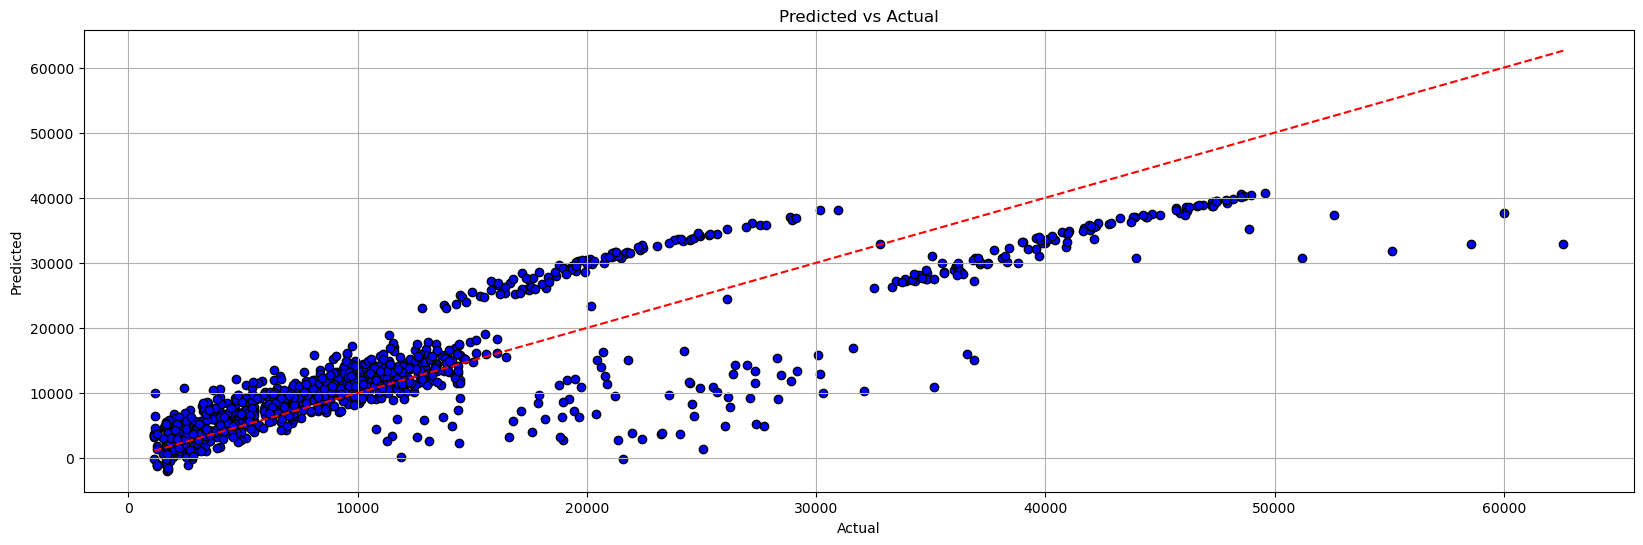

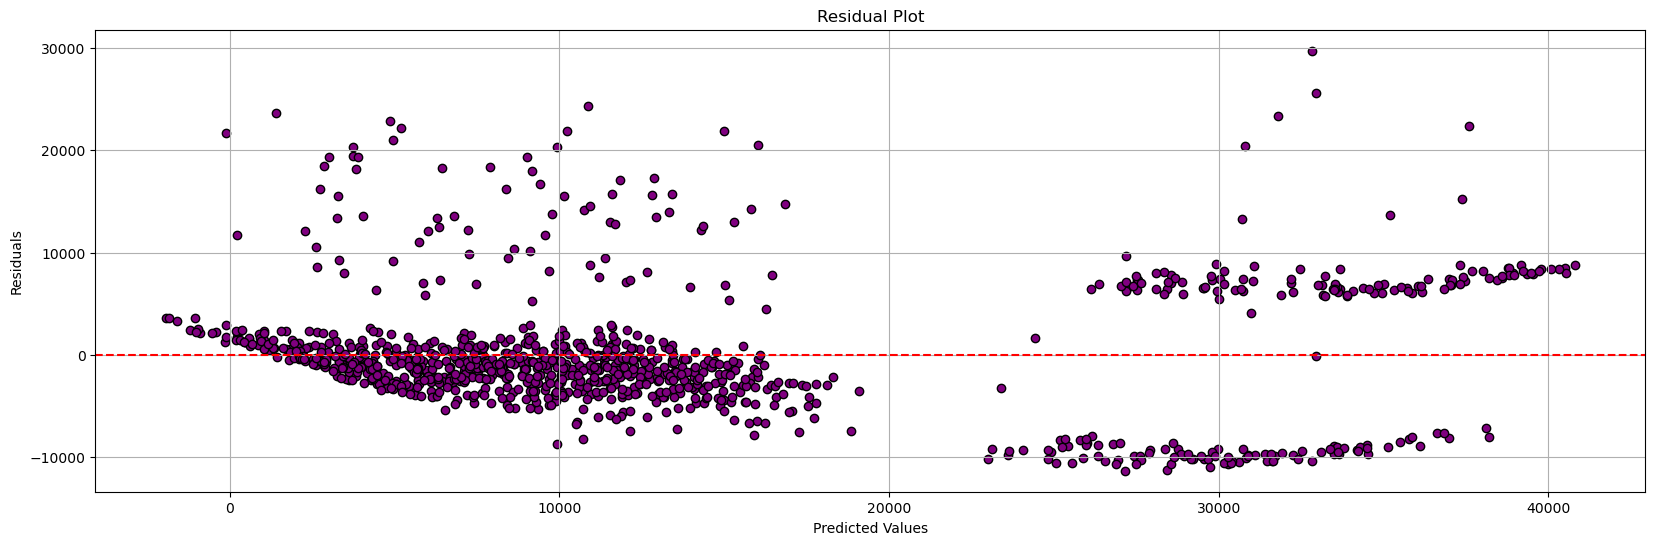

In [14]:


# Import your regression function
train_result = run_multiple_linear_regression(X_train, y_train,X_test, y_test, feature_names=selected_features)


##  **Model Evaluation: Ridge Regression**

###  Overview
Uses L2 regularization to shrink coefficients. Helps reduce overfitting.

###  Training Results
- **Best Lambda**: 15.3239
- **Train MSE**: 37300227.27
- **Test MSE**: 33740587.12
- `**Adjusted R²**: 0.7396`
- `**Train R²**: 0.7416`
- `**Test R²**: 0.7827`
- **AIC**: 18670.93
- **BIC**: 18710.73

**Residual Analysis** <br>
Actual vs Predicted and Residual vs Predicted plotted.

**Notes** <br>
- Slight reduction in overfitting.
- Stable model with reasonable complexity.


The best lambda is : 15.3239
Final training MSE is : 37300227.2677

Total Sum of Squares (TSS) is : 154436975468.4681
Residual Sum of Squares (RSS) is : 39911243176.4119
Train R^2 : 0.7416
Train MSE : 37300227.2677
CP is : 37862378.9239
Adjusted R^2 is : 0.7396
AIC is : 18670.9257
BIC is : 18710.7290
 Test R2: 0.7827
 Test MSE: 33740587.1212


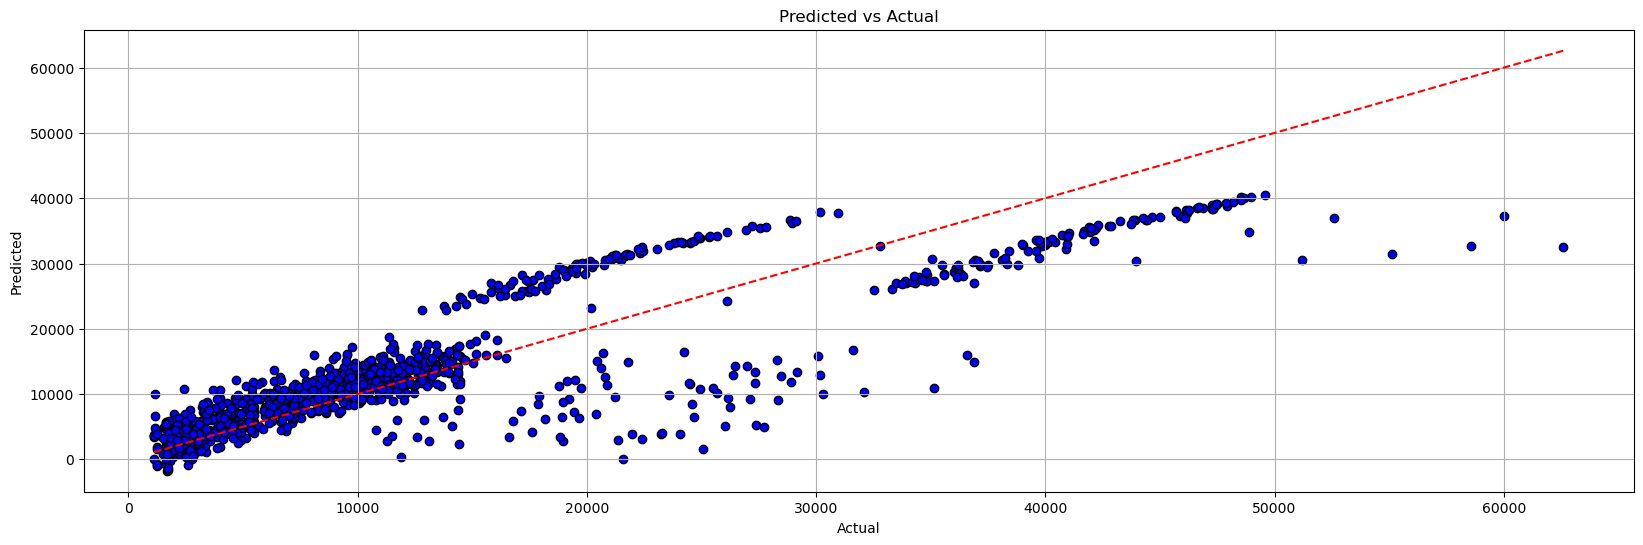

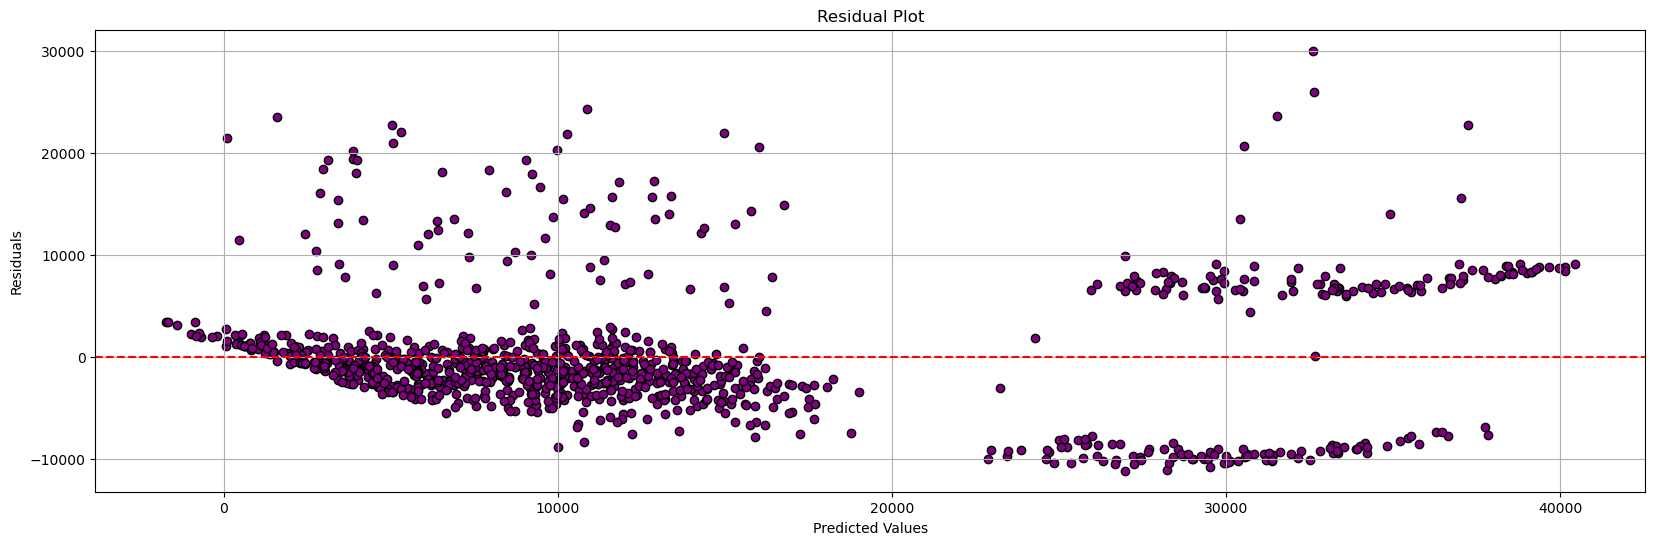

In [15]:
lembda=  np.linspace(0, 100, 9000) 
ridge_model(insurance ,X_train , y_train , X_test, y_test, lembda)


##  **Model Evaluation: Lasso Regression**

**Overview** <br>
Uses L1 regularization. Performs variable selection by driving some coefficients to zero.

### Training Results
- **Best Lambda**: 3.000
- **Train MSE**: 35776256.03
- **Test MSE**: 43520477
- `**Train R^2**`: 0.7452
- `**Test R^2**`: 0.7268
- `**Adjusted R²**: 0.7398`
- **AIC**: 37839972.76
- **BIC**: 39238446.50
- **Cp**: 37839972.76

**Residual Analysis** <br>
Actual vs Predicted and Residual vs Predicted plotted.

### Notes
- Similar performance to Ridge.
- Useful for model interpretability (feature selection).


Best Lambda Value: 3.0000

Lasso Results:
Train RSS: 30624475943.44
Test RSS: 9328362182.41
Estimated Variance σ²: 36156406.07
Mallow's Cp: 36452077.62
AIC: 36452077.62
BIC: 38057918.90
Train MSE: 35776256.94
Test MSE: 43590477.49
RMSE: 5981.33
R² train: 0.7452
R² test: 0.7268
Adjusted R²: 0.7428


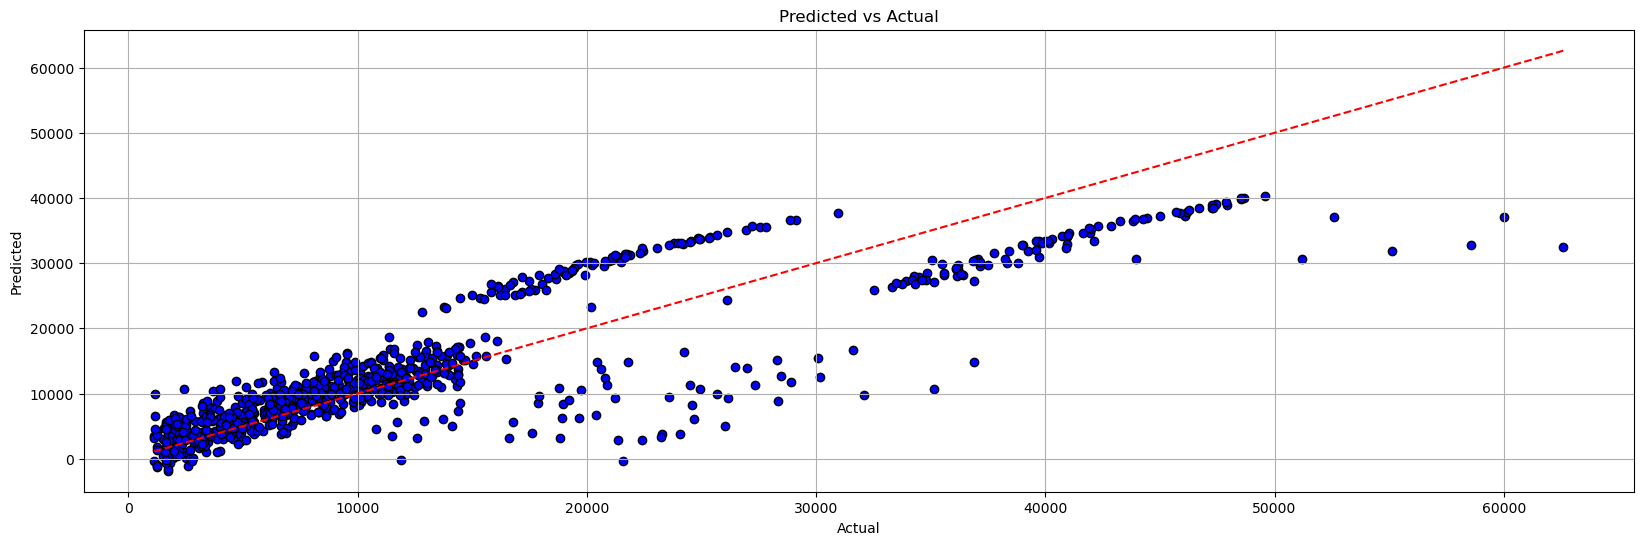

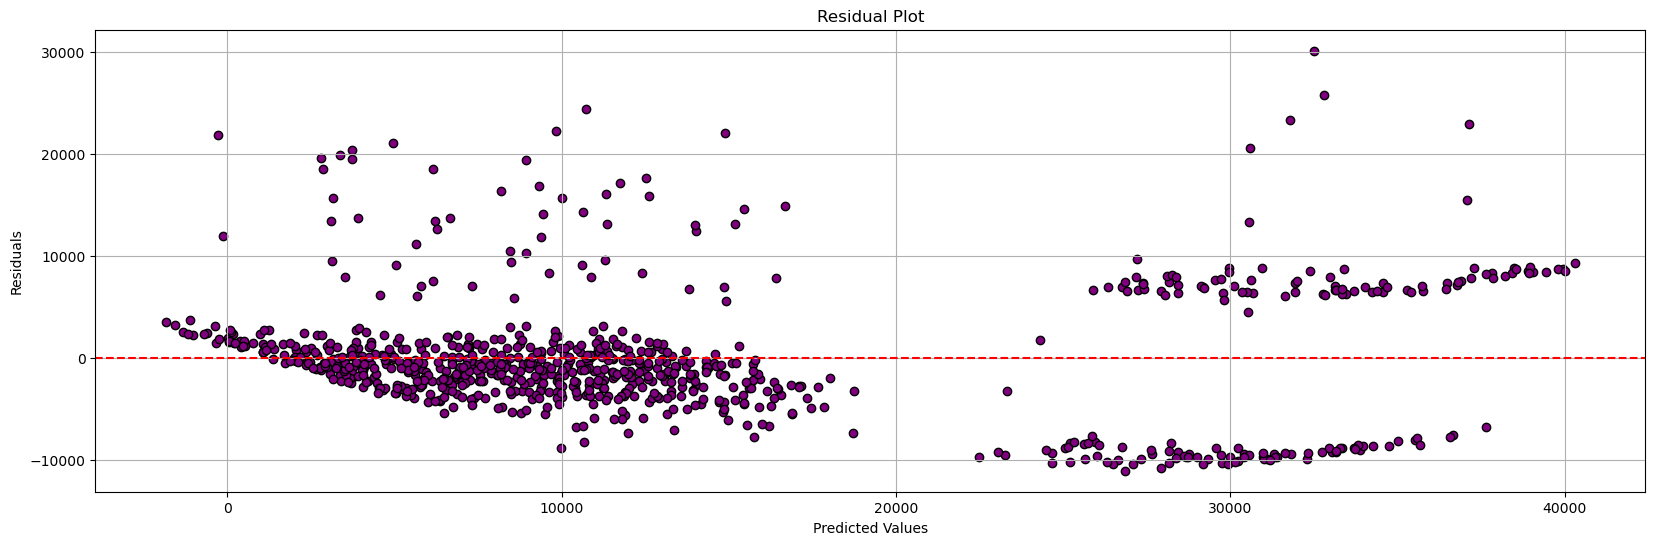

In [16]:
lmda = np.linspace(-2,3,200)
lasso(X_train, y_train, lmda)

## **Model Evaluation: Regression Tree**

**Overview** <br>
Non-linear model using recursive binary splitting.

### **Training Results**
- **Best Alpha**: 0.000
- **MSE**: 45522762.04
- `**R² Score**: 0.6846`

### **Test Results**
- **MSE**: 41059764.26
- `**R² Score**: 0.7355`

**Residual Analysis*** <br>
Actual vs Predicted and Residual vs Predicted plotted.

**Notes** <br>
Lower performance compared to linear models.



Final Model Evaluation Report
───────────────────────────────────
Best Alpha    : 0.0000
Train MSE     : 45522762.0444
Test MSE      : 41059764.2629
Train R² Score: 0.6846
Test R² Score : 0.7355
 Adjusted R^2 : 0.6822


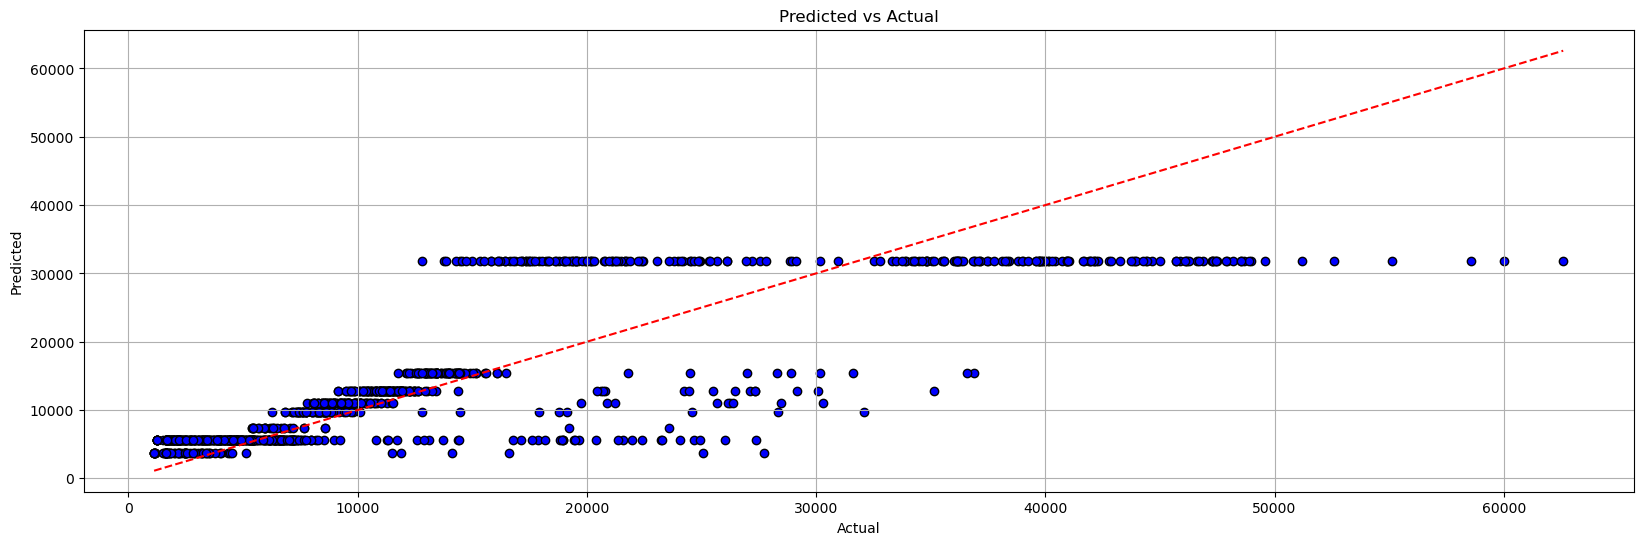

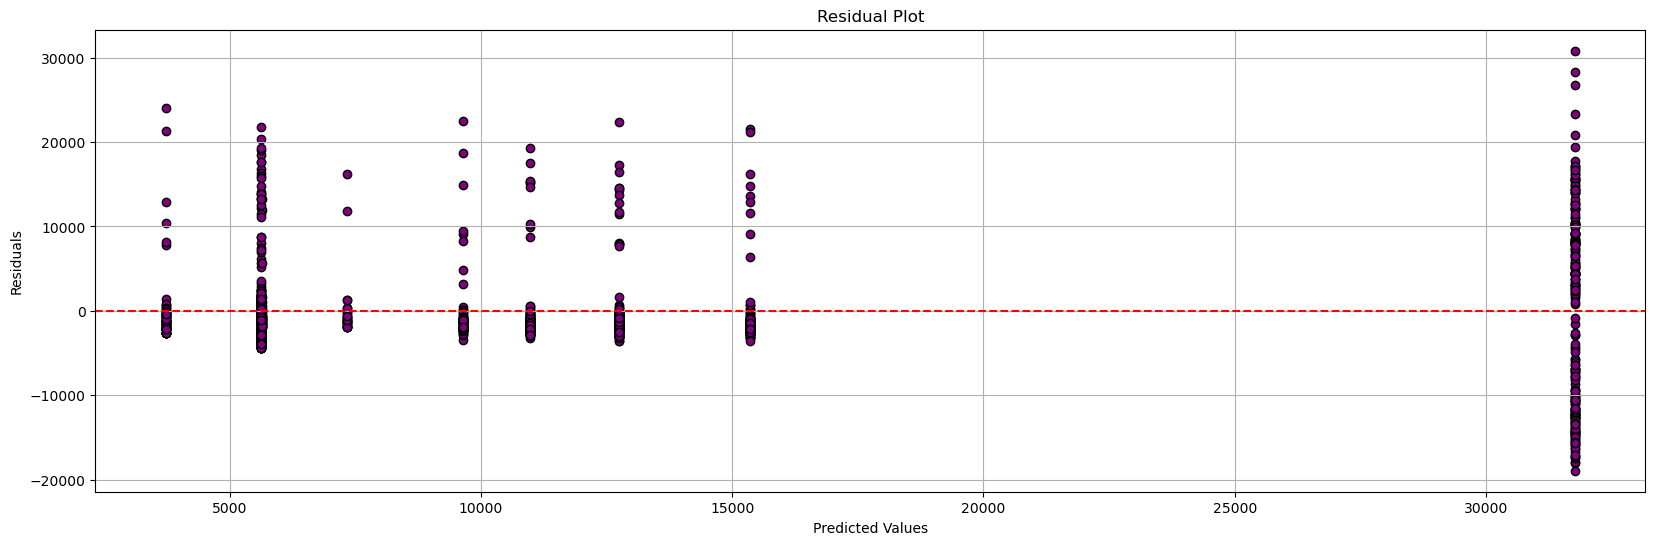

In [17]:


tree_model(X,y)


## **Model Evaluation: Random Forest**

**Overview** <br>
Ensemble of decision trees trained on bootstrapped samples and random feature subsets.
###  **Training Results**
- **MSE**: 34686292.73
- `**R² Score**: 0.7597`
### **Test Results**
- **MSE**: 34809601.36
- `**R² Score**: 0.7758`

**Residual Analysis** <br>
Actual vs Predicted and Residual vs Predicted plotted.

**Notes**
- Better generalization than regression tree.
- Handles non-linearity and interaction terms well.


Final Train MSE: 34686292.72889979
Final Test MSE: 34809601.359947704
Final Train R²: 0.7596797456869354
Final Test R²: 0.7757817340891302
 Adjusted R^2 : 0.7578677173792026


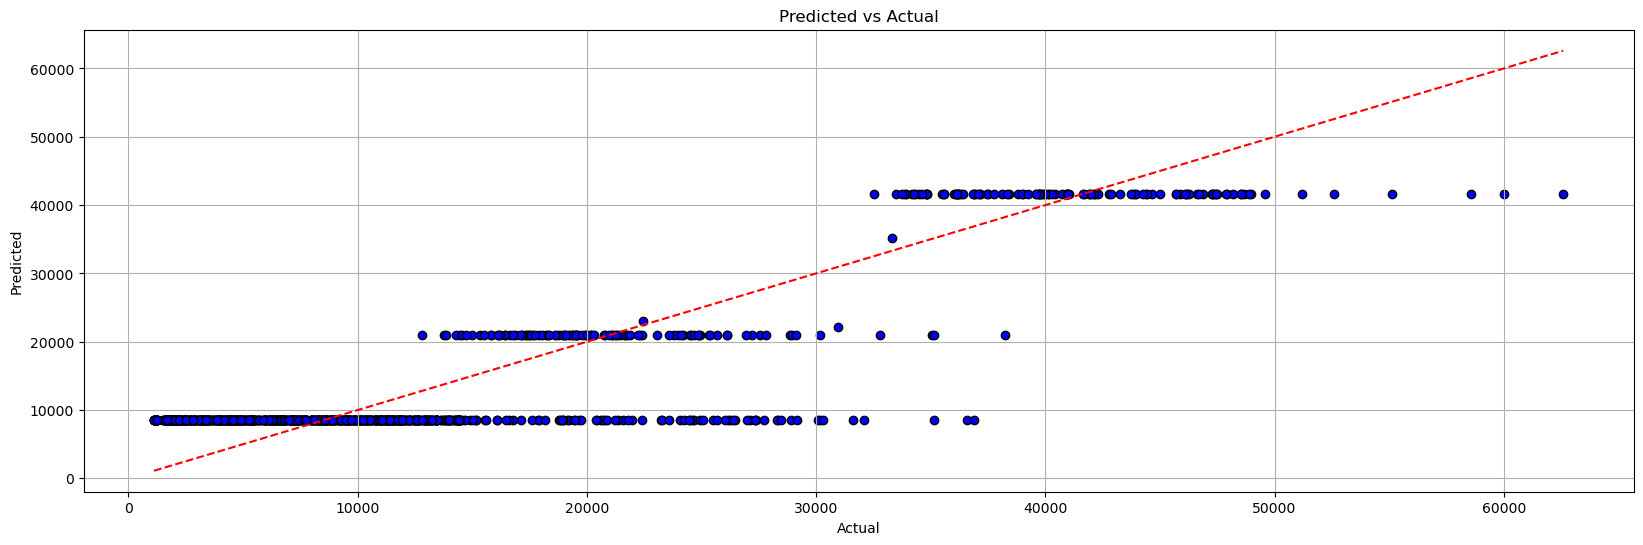

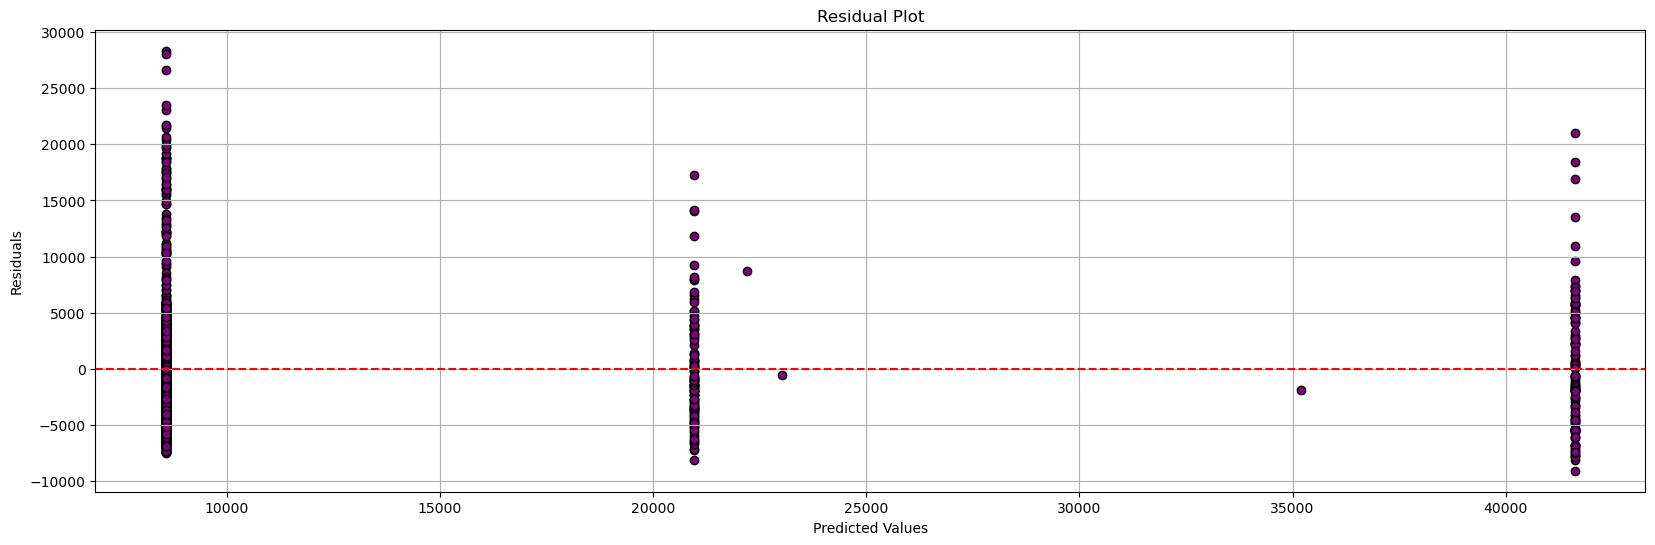

In [18]:
x_r = insurance[['age', 'smoker_yes', 'bmi', 'region_southeast' , 'children' , 'sex_male' , 'region_northwest' , 'region_southwest']]

random_forest(x_r, y, 100)

##  **Model Evaluation: Gradient Boosting**

**Overview** <br>
Boosted trees where each tree corrects the residuals of the previous.

### **Training Results**
- **MSE**: 18705814.62
- `**R² Score**: 0.8704`

### **Test Results**
- **MSE**: 19377710.71
- `**R² Score**: 0.8752`

**Residual Analysis** <br>
Actual vs Predicted and Residual vs Predicted plotted.

### **Notes**
- Best performance overall.
- Risk of overfitting but handled well with proper tuning.


 Final Train MSE: 15222602.38721797
 Final Test MSE: 19523818.93007861
 Final Train R²: 0.8945318340707284
 Final Test R²: 0.8742416846664337
 Adjusted R^2 : 0.8937365981353522


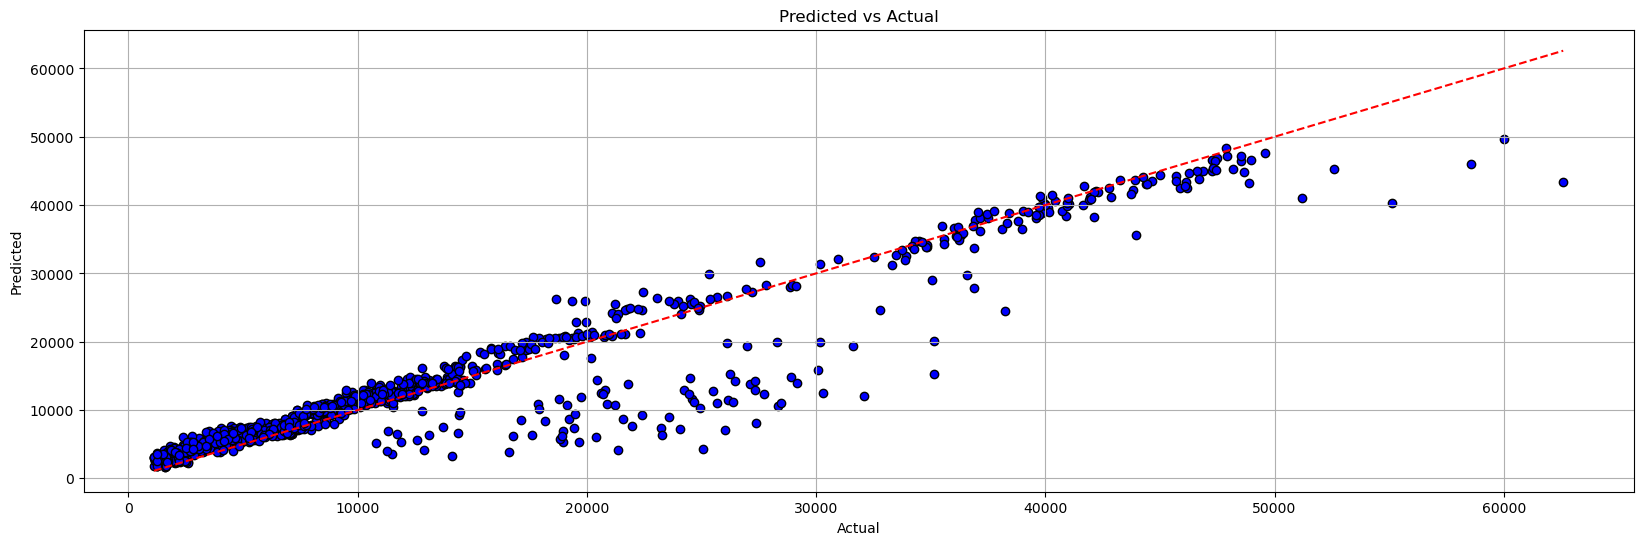

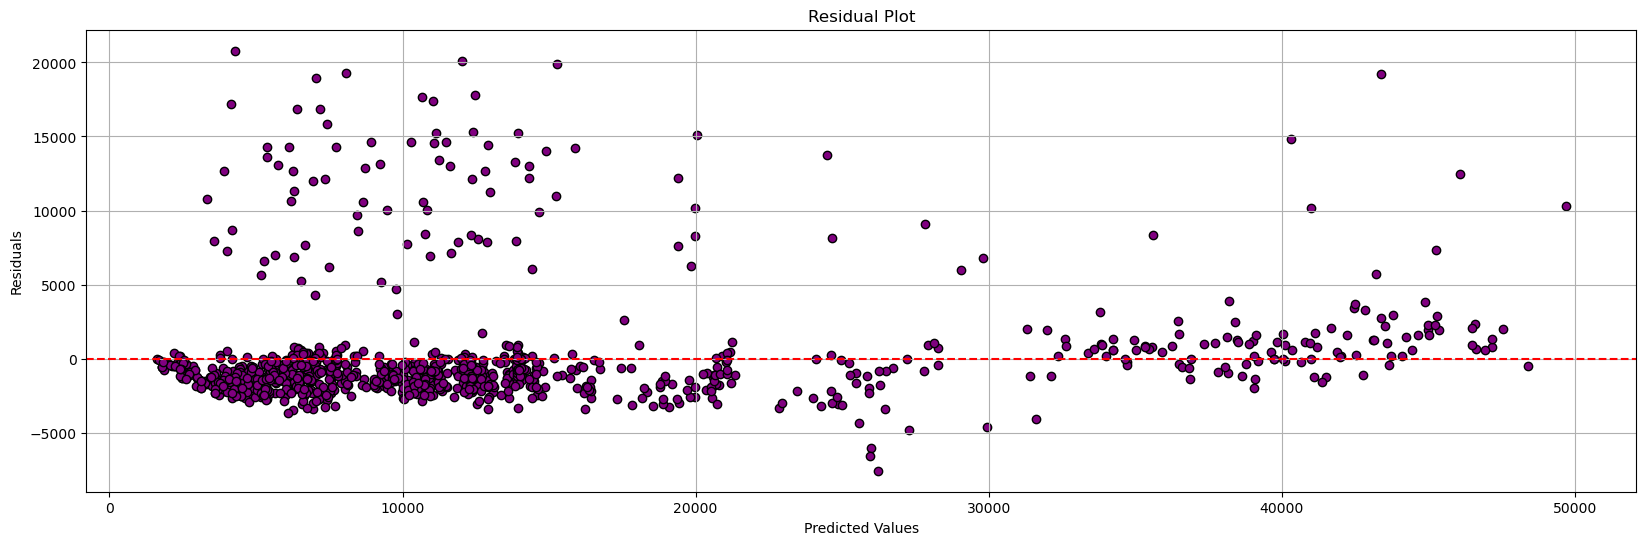

In [19]:

boosting(X_train, y_train, X_test,y_test, n_estimators = 500, learning_rate= 0.01)


## **Final Conclusion**

**Observations:**
- Gradient Boosting clearly dominates with the highest R² on both train and test.
- Random Forest is a strong second, especially on generalization.
- Among linear models, OLS and Lasso show decent performance.
- Ridge and Lasso regularization slightly improves stability.
- Regression Tree performs well but is prone to overfitting without pruning.

| Model               | Train MSE   | Test MSE    | R² (Train) | R² (Test)  | **Adjusted R²** | 
| ------------------- | ----------- | ----------- | ---------- | ---------- | --------------- |
| **OLS**             |37593943.33      | 35953574.97     | 0.7417     | **0.7836** | 0.7417            | 
| **Ridge**           | 37300227.27 | 33740567.20 | 0.7416    | **0.7837**       | 0.7396     | 
| **Lasso**           | 37277819.03 | 35776256.54 | 0.7452     | 0.7268       | 0.7428      |
| **Regression Tree** | 45522762.04 | 41059764.26 | 0.6846     | 0.7355 | 0.6822           | 
| **Random Forest**   | 34686292.73 | 34809601.36 | 0.7597     | **0.7758** |  **0.7578**           |
| **Gradient Boost**  | 15222602.38 | 19523818.93 |**`0.8945`**|**`0.8742`**|   **`0.8937`**         | 


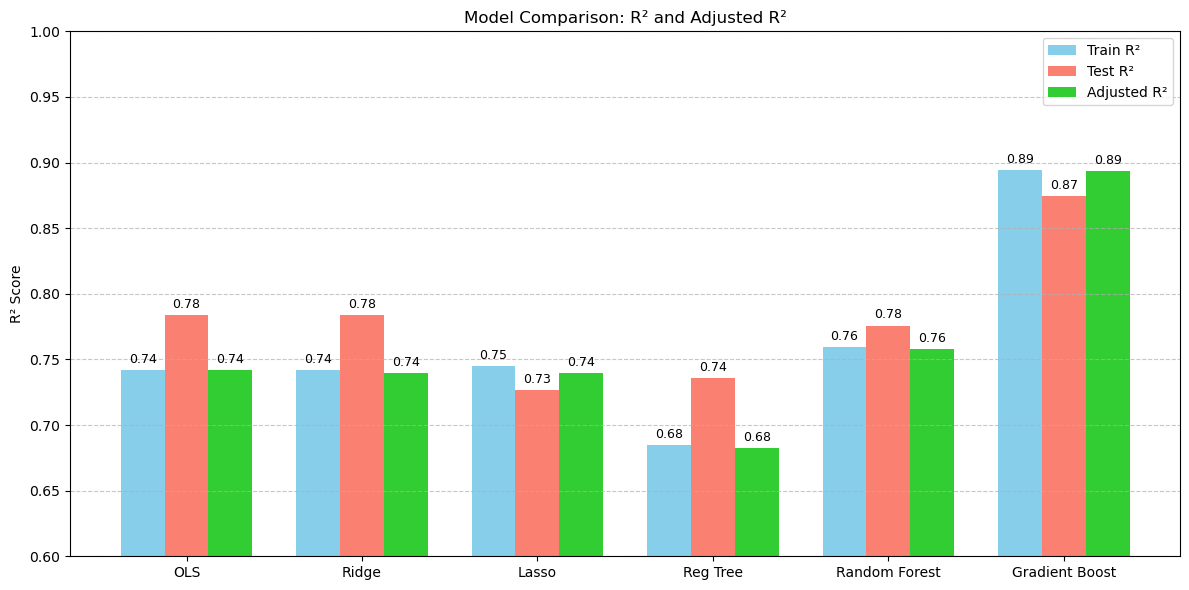

In [20]:


# Models and their metrics
models = ['OLS', 'Ridge', 'Lasso', 'Reg Tree', 'Random Forest', 'Gradient Boost']
r2_train = [0.7417, 0.7416, 0.7452, 0.6846, 0.7597, 0.8945]
r2_test  = [0.7836, 0.7836, 0.7268, 0.7355, 0.7758, 0.8742]
adj_r2   = [0.7417, 0.7396, 0.7398, 0.6822, 0.7578, 0.8937]

# Plotting R² scores
x = np.arange(len(models))
width = 0.25

fig, ax = plt.subplots(figsize=(12, 6))

bar1 = ax.bar(x - width, [v if v is not None else 0 for v in r2_train], width, label='Train R²', color='skyblue')
bar2 = ax.bar(x, [v if v is not None else 0 for v in r2_test], width, label='Test R²', color='salmon')
bar3 = ax.bar(x + width, [v if v is not None else 0 for v in adj_r2], width, label='Adjusted R²', color='limegreen')

# Annotate bars
def annotate_bars(bars, values):
    for bar, val in zip(bars, values):
        if val is not None:
            height = bar.get_height()
            ax.annotate(f'{val:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0, 3), textcoords="offset points",
                        ha='center', va='bottom', fontsize=9)

annotate_bars(bar1, r2_train)
annotate_bars(bar2, r2_test)
annotate_bars(bar3, adj_r2)

ax.set_ylabel('R² Score')
ax.set_title('Model Comparison: R² and Adjusted R²')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()
ax.set_ylim(0.6, 1.0)
ax.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


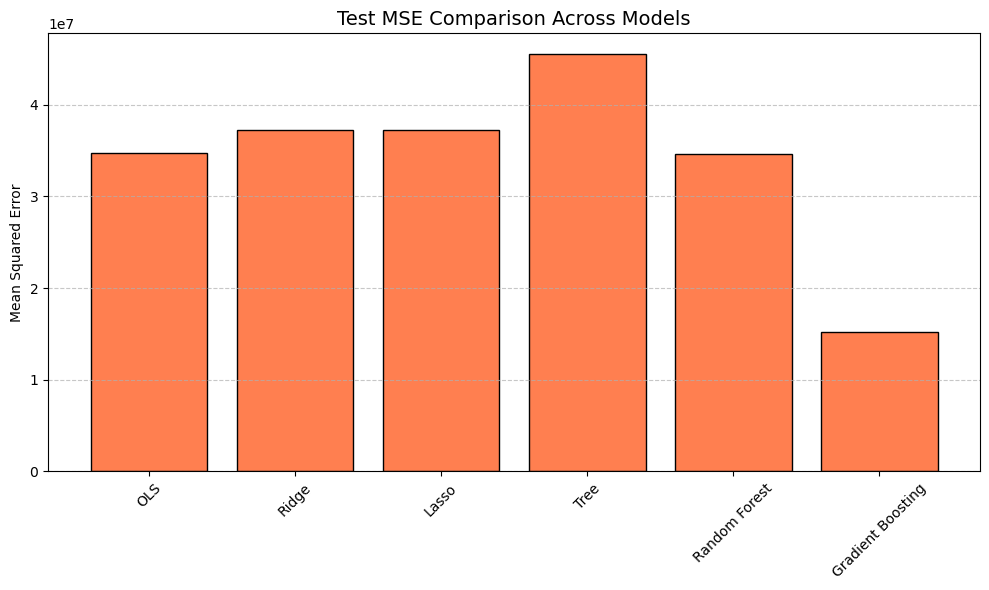

In [21]:

models = ['OLS', 'Ridge', 'Lasso', 'Tree', 'Random Forest', 'Gradient Boosting']
test_mse = [
    5896.13**2,     # OLS Test RSE squared
    37300227.27,  # Approx Ridge Test MSE
    37277819.03,
    45522762.04,
    34686292.73,
    15222602.38
]

plt.figure(figsize=(10, 6))
plt.bar(models, test_mse, color='coral', edgecolor='black')
plt.title("Test MSE Comparison Across Models", fontsize=14)
plt.ylabel("Mean Squared Error")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


**Comparesion of all 6 models on bias-variance characteristics:**

## **Bias-Variance Tradeoff Analysis**

To better understand the generalization ability of each model, we compare a bias-variance decomposition.

This helps quantify:

- **Bias²** – Error due to overly simplistic assumptions in the model.
- **Variance** – Error due to model sensitivity to training data.
- **Noise** – Irreducible error from inherent randomness in data.

### Observations:

- **OLS** shows balanced bias and variance.
- **Ridge/Lasso** control variance better by introducing regularization, leading to higher bias but stable performance.
- **Tree-based models (RF, GB)** have **low bias** and **higher variance**, especially Random Forest.
- **Gradient Boosting** maintains the best tradeoff: low bias, controlled variance.


| Model                 | Bias  | Variance | Generalization | Comments                                           |
| --------------------- | ------------------------ | -------------------------------- | -------------- | -------------------------------------------------- |
| **OLS**               |  Medium-High           |  Medium                        |  Moderate    | Prone to overfitting on noise.                     |
| **Ridge**             |  High (regularization) |  Low                           |  Better      | Reduces overfitting, but may underfit.             |
| **Lasso**             |  High (even more)      |  Very Low                      |  Better      | Sparse model, kills weak features.                 |
| **Regression Tree**   |  Low                   |  Very High                     |  Poor        | High variance, needs pruning.                      |
| **Random Forest**     |  Medium                |  Medium                        |  Great       | Combats overfitting via averaging.                 |
| **Gradient Boosting** |  Low (at start)        |  Medium-High                   |  Excellent   | Strong learner but can overfit if not regularized. |
